<a href="https://colab.research.google.com/github/TVAexe/KPDL-24-25/blob/main/Phan_tich_theo_tap_the_ca_nhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Lọc phân biệt cá nhân và tập thể. Những nội dung có những từ "tap the", "GD", "gia dinh", "cty", "cong ty", "to chuc", "fc", "benh vien","dai hoc","nhom","tap doan", "thuong hieu","cong dong" thì cho vào loại tập thể. Đây là đoạn code xử lí cho file của ngân hàng bidv, sau đó thay đổi tên cột và đường dẫn nội dung chi tiết trong file viettin

In [ ]:
from google.colab import drive
import pandas as pd

# Kết nối Google Drive
drive.mount('/content/drive')

# Đọc file Excel từ Google Drive
file_path = '/content/drive/MyDrive/bidv4_tapthe.xlsx'  # Đường dẫn đến file của bạn
df = pd.read_excel(file_path)

# Danh sách từ khóa cần lọc
keywords = ["tap the", "GD", "gia dinh", "cty", "cong ty", "to chuc", "fc", "benh vien","dai hoc","nhom","tap doan", "thuong hieu","cong dong"]
df['Nội dung chi tiết đã lọc1'] = df['Nội dung chi tiết đã lọc1'].str.replace(r'\n', ' ', regex=True).str.replace(r'\r', ' ', regex=True)

# Tạo điều kiện lọc dựa trên các từ khóa và loại bỏ hàng có từ "ma GD" hoặc các cụm từ "cac gia dinh", "cac gd"
condition = (
    df['Nội dung chi tiết đã lọc1'].str.contains('|'.join(keywords), case=False, na=False) &
    ~df['Nội dung chi tiết đã lọc1'].str.contains('ma GD|GDP', case=False, na=False) &
    ~df['Nội dung chi tiết đã lọc1'].str.contains(r'cac gia dinh|cac gd|gia dinh khac|gd khac', case=False, na=False) &
    ~df['Nội dung chi tiết đã lọc1'].str.contains(r'thoi gian GD:', case=False, na=False)
)

# Lọc các hàng thỏa mãn điều kiện
filtered_df = df[condition]

# Lọc các hàng không thỏa mãn điều kiện
remaining_df = df[~condition]

# Xuất các hàng thỏa mãn điều kiện ra file Excel mới
output_file_path_filtered = '/content/drive/MyDrive/bidv_tap_the.xlsx'  # Đường dẫn đến file đầu ra cho hàng lọc
filtered_df.to_excel(output_file_path_filtered, index=False)

# Xuất các hàng còn lại ra file Excel khác
output_file_path_remaining = '/content/drive/MyDrive/bidv_ca_nhan.xlsx'  # Đường dẫn đến file đầu ra cho hàng còn lại
remaining_df.to_excel(output_file_path_remaining, index=False)

print("Đã lưu file lọc thành công vào:", output_file_path_filtered)
print("Đã lưu file chứa các dòng dữ liệu còn lại vào:", output_file_path_remaining)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đã lưu file lọc thành công vào: /content/drive/MyDrive/bidv_tap_the.xlsx
Đã lưu file chứa các dòng dữ liệu còn lại vào: /content/drive/MyDrive/bidv_ca_nhan.xlsx


#Vẽ biểu đồ số giao dịch tập thể và cá nhân của ngân hàng viettin

---



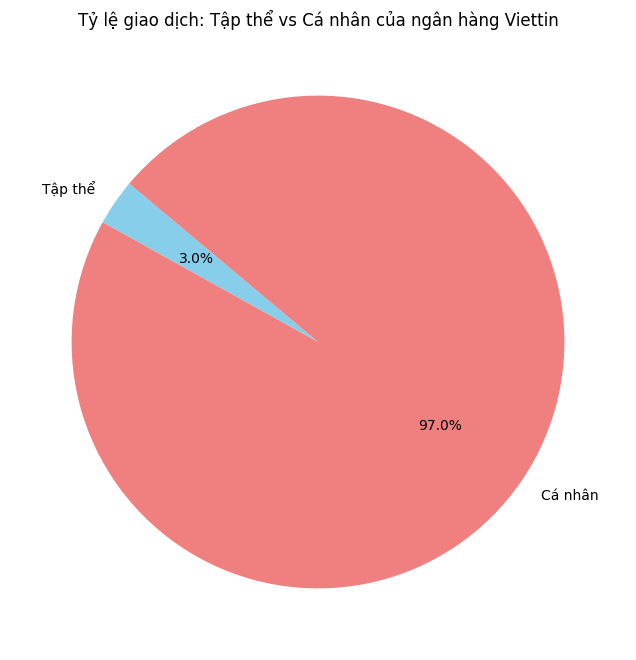

6783
216822


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file
file_path_tap_the = '/content/drive/MyDrive/viettin_tap_the.xlsx'
file_path_ca_nhan = '/content/drive/MyDrive/viettin_ca_nhan.xlsx'

# Đọc dữ liệu từ file
df_tap_the = pd.read_excel(file_path_tap_the)
df_ca_nhan = pd.read_excel(file_path_ca_nhan)

# Tính tổng số hàng cho mỗi loại
so_hang_tap_the = len(df_tap_the)
so_hang_ca_nhan = len(df_ca_nhan)

# Tính phần trăm
tong_so_hang = so_hang_tap_the + so_hang_ca_nhan
phan_tram_tap_the = (so_hang_tap_the / tong_so_hang) * 100
phan_tram_ca_nhan = (so_hang_ca_nhan / tong_so_hang) * 100

# Dữ liệu cho biểu đồ
labels = ['Tập thể', 'Cá nhân']
sizes = [phan_tram_tap_the, phan_tram_ca_nhan]
colors = ['skyblue', 'lightcoral']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ giao dịch: Tập thể vs Cá nhân của ngân hàng Viettin')
plt.show()

print(so_hang_tap_the);

print(so_hang_ca_nhan);


#Vẽ biểu đồ phần trăm tập thể và cá nhân của ngân hàng bidv


1765
46400


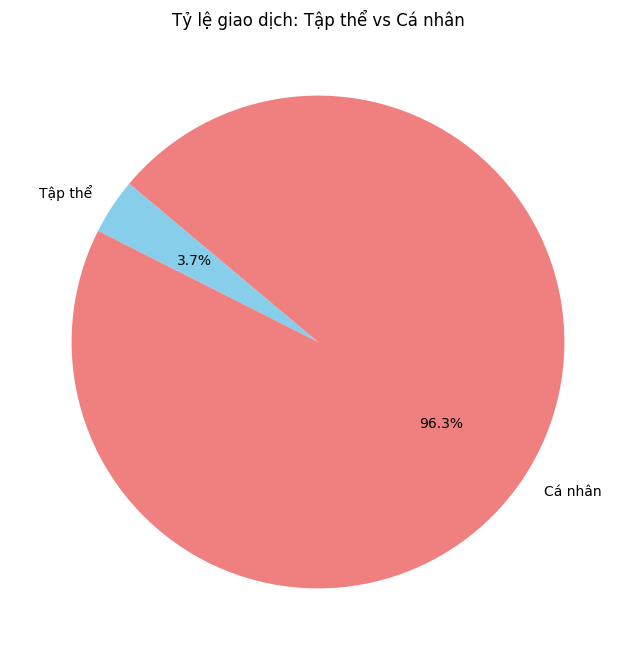

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file
file_path_tap_the = '/content/drive/MyDrive/bidv_tap_the.xlsx'
file_path_ca_nhan = '/content/drive/MyDrive/bidv_ca_nhan.xlsx'

# Đọc dữ liệu từ file
df_tap_the = pd.read_excel(file_path_tap_the)
df_ca_nhan = pd.read_excel(file_path_ca_nhan)

# Tính tổng số hàng cho mỗi loại
so_hang_tap_the = len(df_tap_the)
so_hang_ca_nhan = len(df_ca_nhan)

# Tính phần trăm
tong_so_hang = so_hang_tap_the + so_hang_ca_nhan
phan_tram_tap_the = (so_hang_tap_the / tong_so_hang) * 100
phan_tram_ca_nhan = (so_hang_ca_nhan / tong_so_hang) * 100

# Dữ liệu cho biểu đồ
labels = ['Tập thể', 'Cá nhân']
sizes = [phan_tram_tap_the, phan_tram_ca_nhan]
colors = ['skyblue', 'lightcoral']

print(so_hang_tap_the);
print(so_hang_ca_nhan);

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ giao dịch: Tập thể vs Cá nhân của ngân hàng BIDV')
plt.show()



#Phân loại tập thể và cá nhân của ngân hàng vietcombank sau đó vẽ biểu đồ tròn tỉ lệ % cá nhân tập thể trong ngân hàng

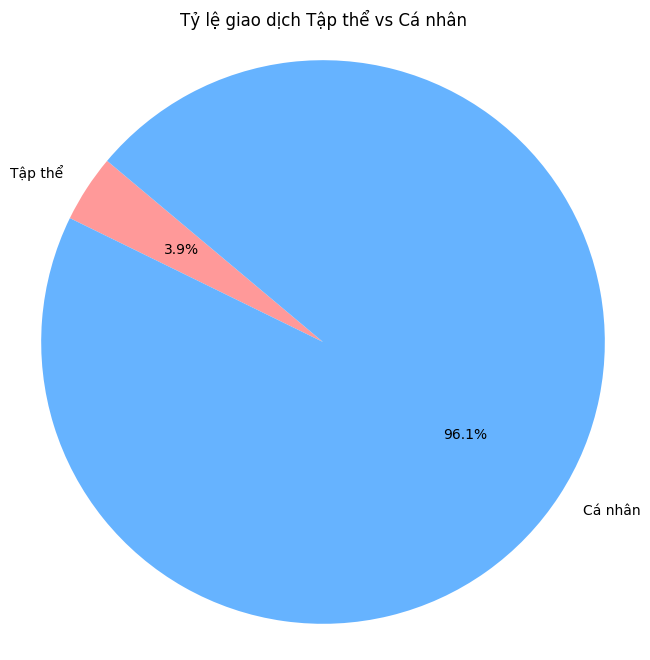

Đã lưu file lọc thành công vào: /content/drive/MyDrive/vcb_tap_the.csv
Đã lưu file chứa các dòng dữ liệu còn lại vào: /content/drive/MyDrive/vcb_ca_nhan.csv
69813
1734662
Tỷ lệ giao dịch Tập thể: 3.868881530639105 %
Tỷ lệ giao dịch Cá nhân: 96.1311184693609 %


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Kết nối Google Drive

# Đọc file CSV từ Google Drive
file_path = '/content/drive/MyDrive/Bản sao của vcb_1-30.csv'  # Đường dẫn đến file CSV của bạn
df = pd.read_csv(file_path)

# Danh sách từ khóa cần lọc
keywords = ["tap the", "GD", "gia dinh", "cty", "cong ty", "to chuc", "fc", "benh vien", "dai hoc", "nhom", "tap doan", "thuong hieu", "cong dong"]

# Làm sạch dữ liệu: Loại bỏ ký tự xuống dòng nếu có
df['Nội dung chi tiết'] = df['Nội dung chi tiết'].str.replace(r'\n', ' ', regex=True).str.replace(r'\r', ' ', regex=True)

# Tạo điều kiện lọc dựa trên các từ khóa và loại bỏ hàng không mong muốn
condition = (
    df['Nội dung chi tiết'].str.contains('|'.join(keywords), case=False, na=False) &  # Chứa từ khóa
    ~df['Nội dung chi tiết'].str.contains('ma GD|GDP', case=False, na=False) &  # Không chứa "ma GD" hoặc "GDP"
    ~df['Nội dung chi tiết'].str.contains(r'cac gia dinh|cac gd|gia dinh khac|gd khac', case=False, na=False) &  # Không chứa cụm từ không mong muốn
    ~df['Nội dung chi tiết'].str.contains(r'thoi gian GD:', case=False, na=False)  # Không chứa "thoi gian GD:"
)

# Lọc các hàng thỏa mãn điều kiện
filtered_df = df[condition]

# Lọc các hàng không thỏa mãn điều kiện
remaining_df = df[~condition]

# Xuất các hàng thỏa mãn điều kiện ra file CSV mới
output_file_path_filtered = '/content/drive/MyDrive/vcb_tap_the.csv'  # Đường dẫn đến file đầu ra cho hàng lọc
filtered_df.to_csv(output_file_path_filtered, index=False)

# Xuất các hàng không thỏa mãn điều kiện ra file CSV khác
output_file_path_remaining = '/content/drive/MyDrive/vcb_ca_nhan.csv'  # Đường dẫn đến file đầu ra cho hàng không thỏa mãn
remaining_df.to_csv(output_file_path_remaining, index=False)

# Tính toán số lượng hàng trong mỗi file
tap_the_count = len(filtered_df)
ca_nhan_count = len(remaining_df)

# Tính phần trăm
total_count = tap_the_count + ca_nhan_count
tap_the_percent = (tap_the_count / total_count) * 100
ca_nhan_percent = (ca_nhan_count / total_count) * 100

# Vẽ biểu đồ tròn
labels = ['Tập thể', 'Cá nhân']
sizes = [tap_the_percent, ca_nhan_percent]
colors = ['#ff9999','#66b3ff']  # Màu sắc cho biểu đồ

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ giao dịch Tập thể vs Cá nhân')
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()

print("Đã lưu file lọc thành công vào:", output_file_path_filtered)
print("Đã lưu file chứa các dòng dữ liệu còn lại vào:", output_file_path_remaining)
print(tap_the_count);
print(ca_nhan_count);
print("Tỷ lệ giao dịch Tập thể:", tap_the_percent, "%")
print("Tỷ lệ giao dịch Cá nhân:", ca_nhan_percent, "%")


#Vẽ biểu đồ theo số tiền mà cá nhân và tập thể đóng góp

Tổng số tiền cho Tập thể: 472933099473.0
Tổng số tiền cho Cá nhân: 1238328428510.0


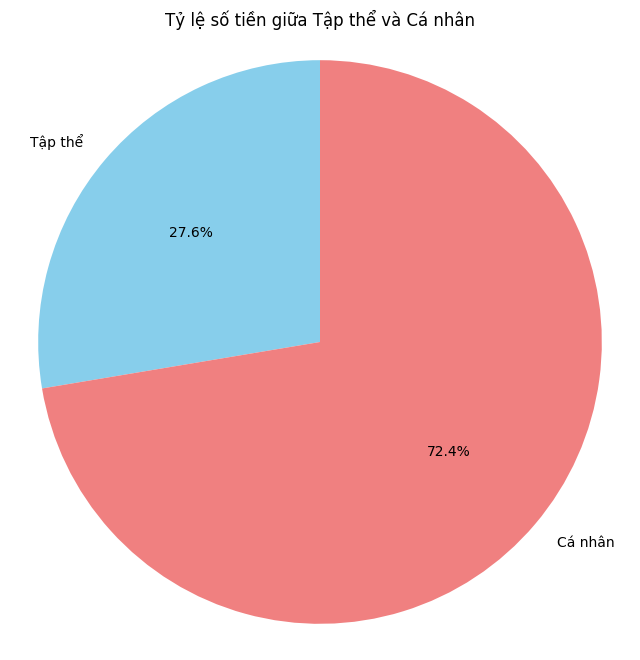

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc và tính tổng số tiền cho từng nhóm từ 6 file
files_and_columns = [
    ('/content/drive/MyDrive/vcb_tap_the.csv', 'Số tiền'),
    ('/content/drive/MyDrive/vcb_ca_nhan.csv', 'Số tiền'),
    ('/content/drive/MyDrive/bidv_tap_the.xlsx', 'Số tiền ghi có (VND)'),
    ('/content/drive/MyDrive/bidv_ca_nhan.xlsx', 'Số tiền ghi có (VND)'),
    ('/content/drive/MyDrive/viettin_tap_the.xlsx', 'credit_off'),
    ('/content/drive/MyDrive/viettin_ca_nhan.xlsx', 'credit_off'),
]

# Khởi tạo tổng số tiền cho Cá nhân và Tập thể
total_tap_the = 0
total_ca_nhan = 0

for file_path, column in files_and_columns:
    # Đọc file
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)

    # Tính tổng số tiền
    if 'tap_the' in file_path:  # Nếu là file của Tập thể
        total_tap_the += df[column].sum()
    elif 'ca_nhan' in file_path:  # Nếu là file của Cá nhân
        total_ca_nhan += df[column].sum()

print("Tổng số tiền cho Tập thể:", total_tap_the)
print("Tổng số tiền cho Cá nhân:", total_ca_nhan)

# Tạo dữ liệu cho biểu đồ
data = [total_tap_the, total_ca_nhan]
labels = ['Tập thể', 'Cá nhân']
colors = ['skyblue', 'lightcoral']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Tỷ lệ số tiền giữa Tập thể và Cá nhân")
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


#Vẽ biểu đồ giao dịch của cá nhân và tập thể của ba ngân hàng

Tổng số dòng (Tập thể): 78361
Tổng số dòng (Cá nhân): 1997884


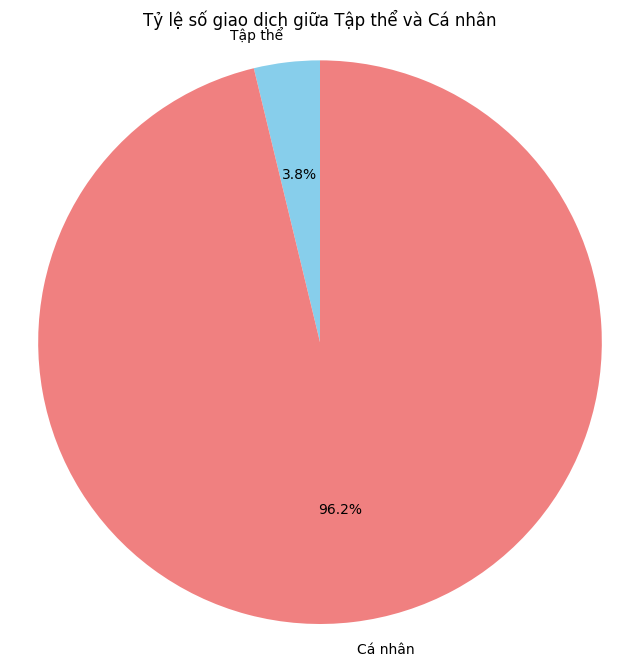

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới các file và thông tin về nhóm
files_and_groups = [
    ('/content/drive/MyDrive/vcb_tap_the.csv', 'Tập thể'),
    ('/content/drive/MyDrive/vcb_ca_nhan.csv', 'Cá nhân'),
    ('/content/drive/MyDrive/bidv_tap_the.xlsx', 'Tập thể'),
    ('/content/drive/MyDrive/bidv_ca_nhan.xlsx', 'Cá nhân'),
    ('/content/drive/MyDrive/viettin_tap_the.xlsx', 'Tập thể'),
    ('/content/drive/MyDrive/viettin_ca_nhan.xlsx', 'Cá nhân'),
]

# Tổng số dòng cho mỗi nhóm
total_rows_tap_the = 0
total_rows_ca_nhan = 0

for file_path, group in files_and_groups:
    try:
        # Đọc file
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file_path.endswith('.xlsx'):
            df = pd.read_excel(file_path)

        # Đếm số dòng
        row_count = len(df)
        if group == 'Tập thể':
            total_rows_tap_the += row_count
        elif group == 'Cá nhân':
            total_rows_ca_nhan += row_count

    except Exception as e:
        print(f"Lỗi khi xử lý file {file_path}: {e}")

# In kết quả
print("Tổng số dòng (Tập thể):", total_rows_tap_the)
print("Tổng số dòng (Cá nhân):", total_rows_ca_nhan)

# Tạo dữ liệu cho biểu đồ
data = [total_rows_tap_the, total_rows_ca_nhan]
labels = ['Tập thể', 'Cá nhân']
colors = ['skyblue', 'lightcoral']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Tỷ lệ số giao dịch giữa Tập thể và Cá nhân")
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


#Tỉ lệ phần trăm giao dịch tập thể của ba ngân hàng

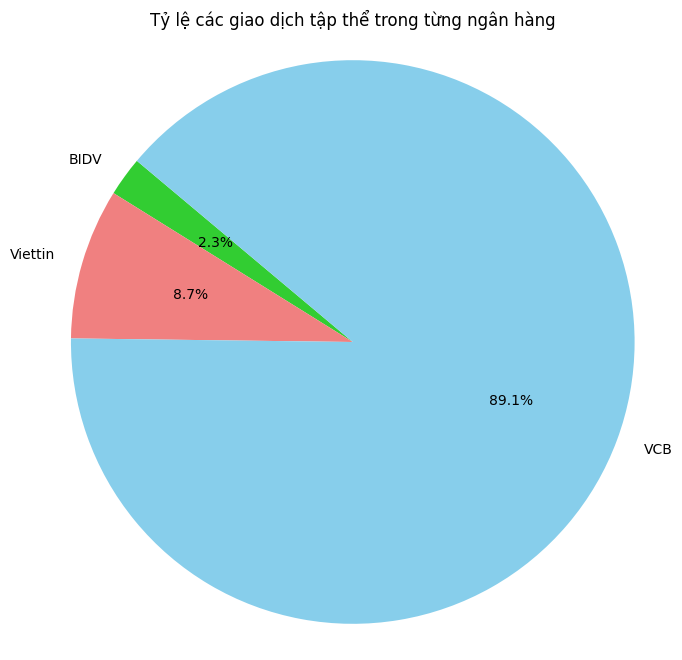

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới các file và thông tin về nhóm
file_path_vcb = '/content/drive/MyDrive/vcb_tap_the.csv'
file_path_bidv = '/content/drive/MyDrive/bidv_tap_the.xlsx'
file_path_viettin = '/content/drive/MyDrive/viettin_tap_the.xlsx'

# Đọc dữ liệu từ file
try:
    df_bidv = pd.read_excel(file_path_bidv)
    df_viettin = pd.read_excel(file_path_viettin)
    df_vcb = pd.read_csv(file_path_vcb)
except Exception as e:
    print(f"Lỗi khi đọc tệp: {e}")
    exit()

# Tính tổng số hàng cho mỗi loại
so_hang_bidv = len(df_bidv)
so_hang_viettin = len(df_viettin)
so_hang_vcb = len(df_vcb)

# Tính phần trăm
tong_so_hang = so_hang_bidv + so_hang_vcb + so_hang_viettin
phan_tram_bidv = (so_hang_bidv / tong_so_hang) * 100
phan_tram_viettin = (so_hang_viettin / tong_so_hang) * 100
phan_tram_vcb = (so_hang_vcb / tong_so_hang) * 100

# Dữ liệu cho biểu đồ
labels = ['BIDV', 'Viettin', 'VCB']
sizes = [phan_tram_bidv, phan_tram_viettin, phan_tram_vcb]
colors = ['limegreen', 'lightcoral', 'skyblue',]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Tỷ lệ các giao dịch tập thể trong từng ngân hàng')
plt.show()


Gộp file xlsx của hai ngân hàng bidv và viettin thành 1 file csv

In [ ]:
import pandas as pd

# Đường dẫn tới file xlsx
input_file = '/content/drive/MyDrive/final.xlsx'  # Thay bằng đường dẫn file xlsx của bạn
output_file = '/content/drive/MyDrive/final_csv.csv'  # Thay bằng đường dẫn file csv muốn lưu

# Đọc file xlsx
data = pd.read_excel(input_file)

# Ghi file sang định dạng csv
data.to_csv(output_file, index=False, encoding='utf-8')

print(f"File đã được chuyển đổi từ {input_file} sang {output_file}")


File đã được chuyển đổi từ /content/drive/MyDrive/final.xlsx sang /content/drive/MyDrive/final_csv.csv


#Lọc các giao dịch trên 100 triệu của ba ngân hàng

In [ ]:
import pandas as pd

# Đọc dữ liệu từ ba tệp
file_path_bidv = '/content/drive/MyDrive/bidv4_tapthe.xlsx'
file_path_vcb = '/content/drive/MyDrive/Bản sao của vcb_1-30.csv'
file_path_final_main = '/content/drive/MyDrive/final_main.xlsx'

# Đọc từng tệp và chọn cột chứa số tiền
df_bidv = pd.read_excel(file_path_bidv)
df_vcb = pd.read_csv(file_path_vcb)
df_final_main = pd.read_excel(file_path_final_main)

# Đặt tên cột số tiền thành "Số tiền" trong mỗi tệp để dễ xử lý
df_bidv['Số tiền'] = df_bidv['Số tiền ghi có (VND)']
df_vcb['Số tiền'] = df_vcb['Số tiền']  # Giả sử cột này đã có tên "Số tiền" trong tệp CSV
df_final_main['Số tiền'] = df_final_main['credit_off']

# Lọc các hàng có số tiền từ 100.000.000 trở lên
high_value_bidv = df_bidv[df_bidv['Số tiền'] >= 100000000]
high_value_vcb = df_vcb[df_vcb['Số tiền'] >= 100000000]
high_value_final_main = df_final_main[df_final_main['Số tiền'] >= 100000000]

# Tạo một Excel writer để xuất ra tệp Excel
output_path = '/content/drive/MyDrive/high_value_transactions1.xlsx'
with pd.ExcelWriter(output_path) as writer:
    high_value_bidv.to_excel(writer, sheet_name='BIDV', index=False)
    high_value_vcb.to_excel(writer, sheet_name='VCB', index=False)
    high_value_final_main.to_excel(writer, sheet_name='Final_Main', index=False)

print(f"Kết quả đã được lưu tại: {output_path}")


Kết quả đã được lưu tại: /content/drive/MyDrive/high_value_transactions1.xlsx


#Giao dịch theo giờ của tập thể

<ipython-input-49-df5b792d17f1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vcb.loc[:, 'hour'] = df_vcb['Ngày GD'].dt.hour
<ipython-input-49-df5b792d17f1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bidv.loc[:, 'hour'] = df_bidv['Thời gian chuyển khoản'].dt.hour


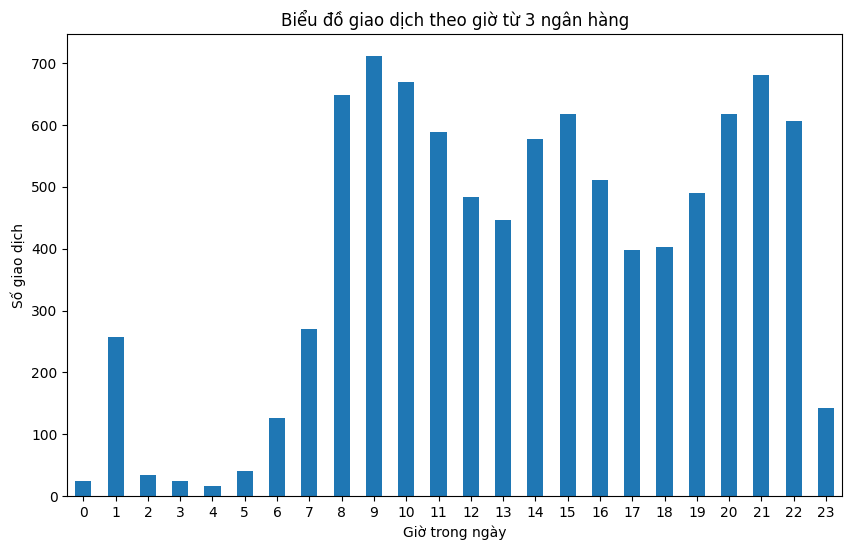

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới các file và cột tương ứng
file_path_vcb = '/content/drive/MyDrive/vcb_tap_the.csv'
file_path_bidv = '/content/drive/MyDrive/bidv_tap_the.xlsx'
file_path_viettin = '/content/drive/MyDrive/viettin_tap_the.xlsx'

# Đọc dữ liệu từ các file
df_vcb = pd.read_csv(file_path_vcb)
df_bidv = pd.read_excel(file_path_bidv)
df_viettin = pd.read_excel(file_path_viettin)

# Chuyển đổi các cột thời gian về dạng datetime và chỉ lấy giờ
df_vcb['Ngày GD'] = pd.to_datetime(df_vcb['Ngày GD'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_bidv['Thời gian chuyển khoản'] = pd.to_datetime(df_bidv['Thời gian chuyển khoản'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_viettin['date_time'] = pd.to_datetime(df_viettin['date_time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Lọc chỉ lấy giờ, bỏ qua các dòng không có giờ
df_vcb = df_vcb[df_vcb['Ngày GD'].notna()]
df_bidv = df_bidv[df_bidv['Thời gian chuyển khoản'].notna()]
df_viettin = df_viettin[df_viettin['date_time'].notna()]

# Sử dụng .loc để gán giá trị cho cột 'hour'
df_vcb.loc[:, 'hour'] = df_vcb['Ngày GD'].dt.hour
df_bidv.loc[:, 'hour'] = df_bidv['Thời gian chuyển khoản'].dt.hour
df_viettin.loc[:, 'hour'] = df_viettin['date_time'].dt.hour

# Gộp tất cả dữ liệu lại thành một dataframe
all_data = pd.concat([df_vcb['hour'], df_bidv['hour'], df_viettin['hour']], axis=0)

# Đếm số giao dịch theo từng giờ
transaction_count_per_hour = all_data.value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
transaction_count_per_hour.plot(kind='bar')
plt.title('Biểu đồ giao dịch theo giờ từ 3 ngân hàng')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=0)
plt.show()


#Giao dịch theo giờ của cá nhân

<ipython-input-2-01eb5d7954c8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vcb.loc[:, 'hour'] = df_vcb['Ngày GD'].dt.hour
<ipython-input-2-01eb5d7954c8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bidv.loc[:, 'hour'] = df_bidv['Thời gian chuyển khoản'].dt.hour


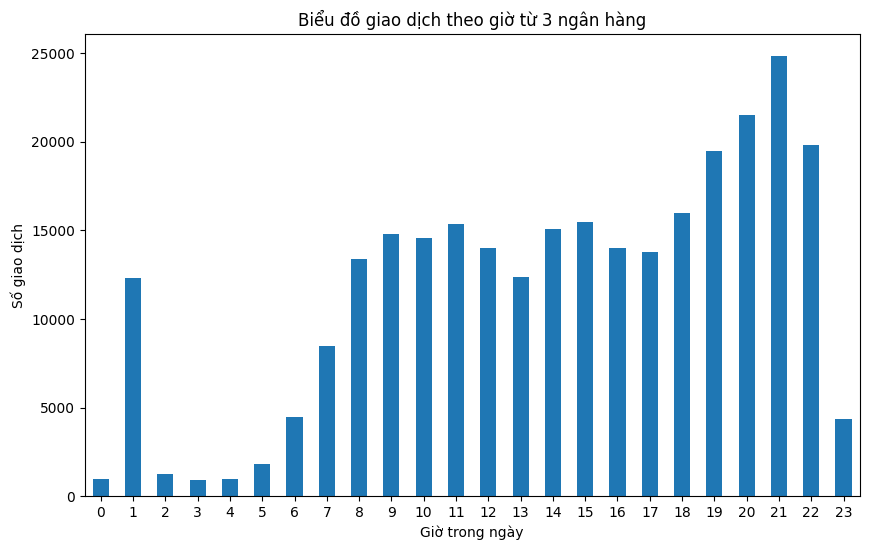

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới các file và cột tương ứng
file_path_vcb = '/content/drive/MyDrive/vcb_ca_nhan.csv'
file_path_bidv = '/content/drive/MyDrive/bidv_ca_nhan.xlsx'
file_path_viettin = '/content/drive/MyDrive/viettin_ca_nhan.xlsx'

# Đọc dữ liệu từ các file
df_vcb = pd.read_csv(file_path_vcb)
df_bidv = pd.read_excel(file_path_bidv)
df_viettin = pd.read_excel(file_path_viettin)

# Chuyển đổi các cột thời gian về dạng datetime và chỉ lấy giờ
df_vcb['Ngày GD'] = pd.to_datetime(df_vcb['Ngày GD'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_bidv['Thời gian chuyển khoản'] = pd.to_datetime(df_bidv['Thời gian chuyển khoản'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_viettin['date_time'] = pd.to_datetime(df_viettin['date_time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Lọc chỉ lấy giờ, bỏ qua các dòng không có giờ
df_vcb = df_vcb[df_vcb['Ngày GD'].notna()]
df_bidv = df_bidv[df_bidv['Thời gian chuyển khoản'].notna()]
df_viettin = df_viettin[df_viettin['date_time'].notna()]

# Sử dụng .loc để gán giá trị cho cột 'hour'
df_vcb.loc[:, 'hour'] = df_vcb['Ngày GD'].dt.hour
df_bidv.loc[:, 'hour'] = df_bidv['Thời gian chuyển khoản'].dt.hour
df_viettin.loc[:, 'hour'] = df_viettin['date_time'].dt.hour

# Gộp tất cả dữ liệu lại thành một dataframe
all_data = pd.concat([df_vcb['hour'], df_bidv['hour'], df_viettin['hour']], axis=0)

# Đếm số giao dịch theo từng giờ
transaction_count_per_hour = all_data.value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
transaction_count_per_hour.plot(kind='bar')
plt.title('Biểu đồ giao dịch theo giờ từ 3 ngân hàng')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=0)
plt.show()
